In [139]:
# IMPORT Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

In [140]:
# Import the dataset
stroke_data = pd.read_csv('../Resources/healthcare-dataset-stroke-data.csv')
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [141]:
stroke_data.shape

(5110, 12)

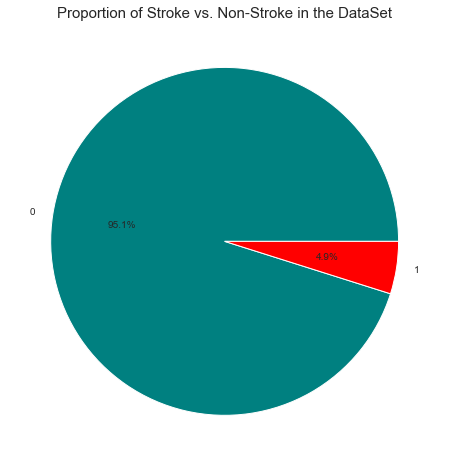

In [142]:
vc_stroke = stroke_data["stroke"].value_counts()
sns.set_style("dark")
plt.pie(vc_stroke.values, labels=vc_stroke.index.values, colors= ["teal", "red"]
        , autopct="%1.1f%%", startangle=0)
plt.gcf().set_size_inches(8,8)
plt.title('Proportion of Stroke vs. Non-Stroke in the DataSet', fontsize=15)

plt.show()

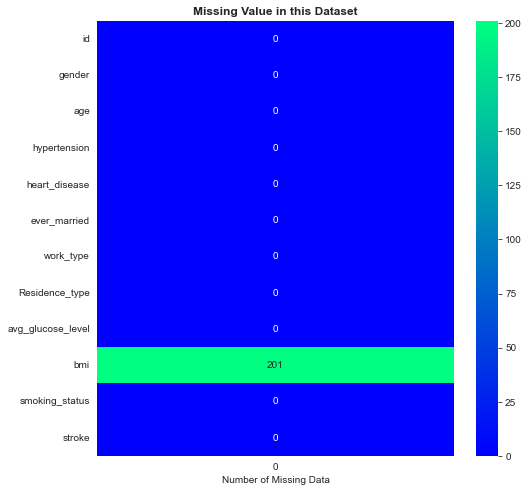

In [143]:

plt.title('Missing Value in this Dataset',fontweight='bold')
sns.set_style("dark")
ax = sns.heatmap(stroke_data.isna().sum().to_frame(),annot=True,fmt='d',cmap='winter')
ax.set_xlabel('Number of Missing Data')
plt.gcf().set_size_inches(8,8)
plt.savefig('nancomposition.jpg', dpi=200) 
plt.show()

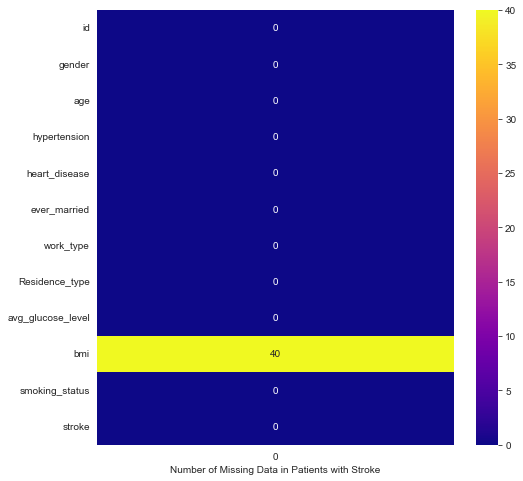

In [144]:
stroke_population = stroke_data.query('stroke ==1').copy()
sns.set_style("dark")
ax = sns.heatmap(stroke_population.isna().sum().to_frame(),annot=True,fmt='d',cmap='plasma')
ax.set_xlabel('Number of Missing Data in Patients with Stroke')
plt.gcf().set_size_inches(8,8)
plt.savefig('nancompositioninstroke.jpg', dpi=200) 
plt.show()

In [145]:
stroke_data["stroke"].isna().sum()


0

In [146]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [147]:
#drop duplicates
stroke_data = stroke_data.drop_duplicates(subset='id', keep="first")
stroke_data.shape

(5110, 12)

In [148]:
stroke_data = stroke_data.drop('id', 1)

/var/folders/h4/v2g57xvj6mz75vxd96qdxsqw0000gn/T/ipykernel_20154/1189872448.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stroke_data = stroke_data.drop('id', 1)


In [149]:
stroke_data['bmi']=stroke_data['bmi'].fillna(stroke_data['bmi'].mean())

In [150]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [151]:
stroke_data['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [152]:
stroke_data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [153]:
stroke_data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [154]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [155]:
stroke_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [156]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [157]:
stroke_data['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [158]:
stroke_data['bmi'].value_counts()

28.893237    201
28.700000     41
28.400000     38
27.600000     37
26.700000     37
            ... 
11.500000      1
40.600000      1
53.900000      1
97.600000      1
14.900000      1
Name: bmi, Length: 419, dtype: int64

In [159]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [160]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [161]:
stroke_data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [162]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [163]:
stroke_data.rename(columns = {'Residence_type':'residence_type'}, inplace = True)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [164]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [165]:
stroke_data['gender'] = stroke_data['gender'].replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
stroke_data['residence_type'] = stroke_data['residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
stroke_data['work_type'] = stroke_data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
stroke_data['ever_married'] = stroke_data['ever_married'].replace({'Yes':1,'No':0}).astype(np.uint8)
stroke_data['smoking_status'] = stroke_data['smoking_status'].replace({'never smoked':0,'smokes':1,'formerly smoked':2, 'Unknown':3}).astype(np.uint8)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.600000,2,1
1,1,61.0,0,0,1,1,0,202.21,28.893237,0,1
2,0,80.0,0,1,1,0,0,105.92,32.500000,0,1
3,1,49.0,0,0,1,0,1,171.23,34.400000,1,1
4,1,79.0,1,0,1,1,0,174.12,24.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,1,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,1,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,0,51.0,0,0,1,0,0,166.29,25.600000,2,0


In [166]:
oversample = SMOTE()
eval_df0 = stroke_data[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','bmi','smoking_status','stroke']].sample(int(stroke_data.shape[0]*0.2),random_state=42)
train_df0 = stroke_data.drop(index=eval_df0.index)

X_eval_init0,y_eval_init0 = eval_df0[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','bmi','smoking_status']], eval_df0['stroke']
X_train_init0,y_train_init0 = train_df0[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','bmi','smoking_status']], train_df0['stroke']


X_train_smote0, y_train_smote0 = oversample.fit_resample(X_train_init0,y_train_init0)


X_eval_smote0,y_eval_smote0 = oversample.fit_resample(X_eval_init0,y_eval_init0)


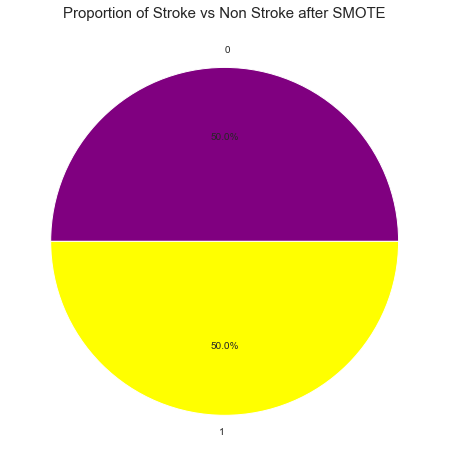

In [167]:
new_eval_df = X_eval_smote0.assign(Stroke = y_eval_smote0)
sns.set_style("dark")
vc_newstroke = new_eval_df["Stroke"].value_counts()
plt.pie(vc_newstroke.values, labels=vc_stroke.index.values, colors= ["purple", "yellow"]
        , autopct="%1.1f%%", startangle=0)
plt.gcf().set_size_inches(8,8)
plt.title('Proportion of Stroke vs Non Stroke after SMOTE', fontsize=15)
plt.savefig('proportionaftersmote.jpg', dpi=200) 
plt.show()

In [168]:
from sklearn.pipeline import Pipeline
rf_pipeline0 = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=88))])
logreg_pipeline0 = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=88))])


In [169]:
rf_pipeline0.fit(X_train_smote0,y_train_smote0)

logreg_pipeline0.fit(X_train_smote0,y_train_smote0)

Pipeline(steps=[('scale', StandardScaler()),
                ('LR', LogisticRegression(random_state=88))])

In [170]:
X_train_smote0

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.000000,0,1,1,0,1,228.690000,36.600000,2
1,1,61.000000,0,0,1,1,0,202.210000,28.893237,0
2,0,80.000000,0,1,1,0,0,105.920000,32.500000,0
3,1,49.000000,0,0,1,0,1,171.230000,34.400000,1
4,1,79.000000,1,0,1,1,0,174.120000,24.000000,0
...,...,...,...,...,...,...,...,...,...,...
7797,0,71.175575,0,0,1,0,0,75.287479,24.006868,1
7798,0,75.069934,0,0,0,1,1,109.927328,28.851434,2
7799,0,79.985929,1,0,1,0,0,74.527036,26.974009,0
7800,0,63.387655,0,0,1,1,0,114.864147,32.326513,2


In [171]:
rf_pred0   =rf_pipeline0.predict(X_eval_smote0)

logreg_pred0   = logreg_pipeline0.predict(X_eval_smote0)

In [172]:
rf_f1_0  = f1_score(y_eval_smote0,rf_pred0)

logreg_f1_0  = f1_score(y_eval_smote0,logreg_pred0)

In [173]:
rf_f1_0

0.607681755829904

In [174]:
print('Random Forest')
print(classification_report(y_eval_smote0,rf_pred0))

print('Accuracy Score: ',accuracy_score(y_eval_smote0,rf_pred0))

Random Forest
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       960
           1       0.89      0.46      0.61       960

    accuracy                           0.70      1920
   macro avg       0.76      0.70      0.68      1920
weighted avg       0.76      0.70      0.68      1920

Accuracy Score:  0.7020833333333333


In [175]:
rf0_cr = classification_report(y_eval_smote0,rf_pred0, output_dict=True)
rf0_cr['1']

{'precision': 0.8895582329317269,
 'recall': 0.46145833333333336,
 'f1-score': 0.607681755829904,
 'support': 960}

In [176]:
add_rf0= [('accuracy', 0.7140625)]

In [177]:
rf0_lis = list(rf0_cr['1'].values())


In [178]:
rf0_lis

[0.8895582329317269, 0.46145833333333336, 0.607681755829904, 960]

In [179]:
rf0_lis[3] = 0.7140625

In [180]:
rf0_lis
rf0_df = pd.DataFrame(rf0_lis)

In [181]:
rf0_df.to_csv("rf0_cr.csv")

In [182]:
print('Logistic Regression')
print(classification_report(y_eval_smote0,logreg_pred0))

print('Accuracy Score: ',accuracy_score(y_eval_smote0,logreg_pred0))

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       960
           1       0.80      0.78      0.79       960

    accuracy                           0.79      1920
   macro avg       0.79      0.79      0.79      1920
weighted avg       0.79      0.79      0.79      1920

Accuracy Score:  0.7932291666666667


In [183]:
logreg0_cr = classification_report(y_eval_smote0,logreg_pred0, output_dict=True)
logreg0_cr['1']
logreg0_lis = list(logreg0_cr['1'].values())
logreg0_lis[3] = 0.7963541666666667
logreg0_df = pd.DataFrame(logreg0_lis)
logreg0_df.to_csv("logreg0_cr.csv")

In [184]:
logreg_pipeline0['LR'].coef_

array([[-0.47500476,  2.12398214, -0.31028823, -0.27756388, -0.57201149,
        -0.53836979, -0.57602542,  0.34156372,  0.004739  , -0.29722948]])

In [185]:
feature_imp_df = pd.DataFrame({"column":X_eval_smote0.columns, "importance":logreg_pipeline0['LR'].coef_[0]}).sort_values(by="importance")
feature_imp_df

,column,importance
6,residence_type,-0.576025
4,ever_married,-0.572011
5,work_type,-0.538370
0,gender,-0.475005
2,hypertension,-0.310288
9,smoking_status,-0.297229
3,heart_disease,-0.277564
8,bmi,0.004739
7,avg_glucose_level,0.341564
1,age,2.123982


In [186]:
feature_imp_df.to_csv("feature_imp_df.csv")

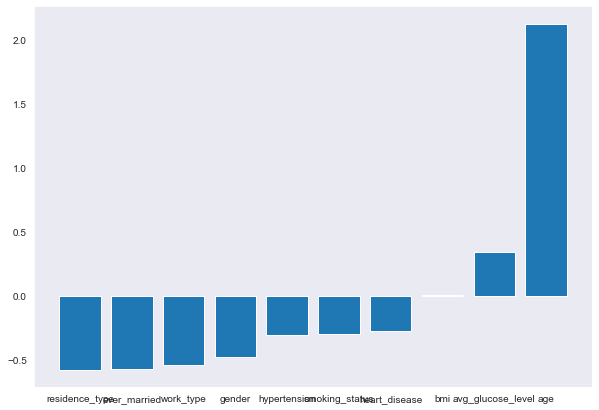

In [187]:

# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(feature_imp_df.column, feature_imp_df.importance)
 
# Show Plot
plt.show()

In [189]:

eval_df1 = stroke_data[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','smoking_status','stroke']].sample(int(stroke_data.shape[0]*0.2),random_state=42)
train_df1 = stroke_data.drop(index=eval_df1.index)

X_eval_init1,y_eval_init1 = eval_df1[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','smoking_status']], eval_df1['stroke']
X_train_init1,y_train_init1 = train_df1[['gender','age','hypertension','heart_disease','ever_married','work_type','residence_type','avg_glucose_level','smoking_status']], train_df1['stroke']


X_train_smote1, y_train_smote1 = oversample.fit_resample(X_train_init1,y_train_init1)


X_eval_smote1,y_eval_smote1 = oversample.fit_resample(X_eval_init1,y_eval_init1)


In [190]:
rf_pipeline1 = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=88))])
logreg_pipeline1 = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=88))])

rf_pipeline1.fit(X_train_smote1,y_train_smote1)

logreg_pipeline1.fit(X_train_smote1,y_train_smote1)

Pipeline(steps=[('scale', StandardScaler()),
                ('LR', LogisticRegression(random_state=88))])

In [191]:
rf_pred1   =rf_pipeline1.predict(X_eval_smote1)

logreg_pred1   = logreg_pipeline1.predict(X_eval_smote1)

In [192]:
rf_f1_1  = f1_score(y_eval_smote1,rf_pred1)

logreg_f1_1  = f1_score(y_eval_smote1,logreg_pred1)

In [193]:
rf_f1_1

0.6258411843876178

In [194]:
logreg_f1_1 

0.7920792079207921

In [195]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print('Random Forest')
print(classification_report(y_eval_smote1,rf_pred1))

print('Accuracy Score: ',accuracy_score(y_eval_smote1,rf_pred1))

Random Forest
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       960
           1       0.88      0.48      0.63       960

    accuracy                           0.71      1920
   macro avg       0.76      0.71      0.69      1920
weighted avg       0.76      0.71      0.69      1920

Accuracy Score:  0.7104166666666667


In [196]:
rf1_cr = classification_report(y_eval_smote1,rf_pred1, output_dict=True)
rf1_cr['1']
rf1_lis = list(rf1_cr['1'].values())
rf1_lis[3] = 0.7020833333333333
rf1_df = pd.DataFrame(rf1_lis)
rf1_df.to_csv("rf1_cr.csv")

In [197]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print('Log Reg')
print(classification_report(y_eval_smote1,logreg_pred1))

print('Accuracy Score: ',accuracy_score(y_eval_smote1,logreg_pred1))

Log Reg
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       960
           1       0.79      0.79      0.79       960

    accuracy                           0.79      1920
   macro avg       0.79      0.79      0.79      1920
weighted avg       0.79      0.79      0.79      1920

Accuracy Score:  0.7921875


In [198]:
logreg1_cr = classification_report(y_eval_smote1,logreg_pred1, output_dict=True)
logreg1_cr['1']
logreg1_lis = list(logreg1_cr['1'].values())
logreg1_lis[3] = 0.8010416666666667
logreg1_df = pd.DataFrame(logreg1_lis)
logreg1_df.to_csv("logreg1_cr.csv")

In [199]:
logreg_pred1.shape

(1920,)

In [97]:
from sklearn.metrics import confusion_matrix
logreg_pred1_smote   = logreg_pipeline1.predict(X_eval_smote1)
confusion_matrix(y_eval_smote1, logreg_pred1_smote)

array([[762, 198],
       [184, 776]])

/Users/andrianichristanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


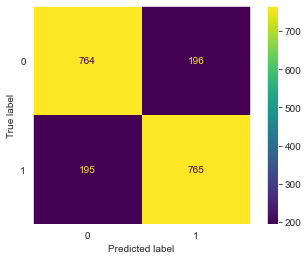

In [138]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg_pipeline1, X_eval_smote1, y_eval_smote1)
plt.savefig('logreg_confusionmatrix.jpg', dpi=200) 
plt.show()

In [132]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

param_grid = {'penalty': penalty,'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,param_grid)

In [133]:
grid.fit(X_train_smote1,y_train_smote1)

/Users/andrianichristanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrianichristanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

/Users/andrianichristanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrianichristanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [134]:
grid.best_params_

{'C': 1, 'penalty': 'l2'}

In [135]:
logreg_pipeline_new = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=1,penalty='l2',random_state=88))])

logreg_pipeline_new.fit(X_train_smote1,y_train_smote1)


logreg_tuned_pred_new   = logreg_pipeline_new.predict(X_eval_smote1)

In [136]:
##TUNED MODEL SCORED THE SAME SO WILL NOT CHANGE THE MODEL
print(classification_report(y_eval_smote1, logreg_tuned_pred_new))

print('Accuracy Score: ',accuracy_score(y_eval_smote1,logreg_tuned_pred_new))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       960
           1       0.80      0.80      0.80       960

    accuracy                           0.80      1920
   macro avg       0.80      0.80      0.80      1920
weighted avg       0.80      0.80      0.80      1920

Accuracy Score:  0.7963541666666667


In [103]:
## SAVING THE INITIAL LOGISTIC REGRESSION FILE
import pickle
with open('stroke_logreg_final88.pkl', 'wb') as file:
    pickle.dump(logreg_pipeline1, file)

In [104]:
loaded_model = pickle.load(open('stroke_logreg_final88.pkl', 'rb'))
loaded_model_prediction = loaded_model.predict(X_eval_smote1)

In [105]:
y_eval_init1

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [106]:
list_of_values = list(zip(loaded_model_prediction, y_eval_smote1))
df_eval = pd.DataFrame(list_of_values, columns = ['model_pred', 'y_eval'])

pd.set_option('display.max_rows', 2000)

In [107]:
df_eval.head(300)

,model_pred,y_eval
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
5,1,0
6,0,0
7,1,0
8,0,0
9,0,0


In [108]:
X_eval_smote1


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,smoking_status
0,0,31.000000,0,0,0,1,0,64.850000,3
1,0,40.000000,0,0,1,1,0,65.290000,0
2,1,8.000000,0,0,0,3,1,74.420000,3
3,1,79.000000,1,0,1,1,0,76.640000,0
4,1,75.000000,0,0,1,2,0,94.770000,0
5,1,79.000000,1,0,1,1,0,92.430000,0
6,1,56.000000,1,0,1,0,0,97.370000,1
7,0,69.000000,0,0,1,0,0,101.520000,1
8,0,7.000000,0,0,0,1,0,64.060000,3
9,1,1.480000,0,0,0,3,0,55.510000,3
